In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr

# Define the Neural Network Model
class LogicGateNN(nn.Module):
    def __init__(self):
        super(LogicGateNN, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(2, 2),
            nn.ReLU(),
            nn.Linear(2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layer(x)


In [2]:
# Prepare the Dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)


In [3]:
# Initialize the model, loss function, and optimizer
model = LogicGateNN()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
for epoch in range(10000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

# Check the trained model's performance
with torch.no_grad():
    predictions = model(X)
    print("Predictions:", predictions.numpy())


Predictions: [[0.3334642 ]
 [0.99961495]
 [0.3334642 ]
 [0.3334642 ]]


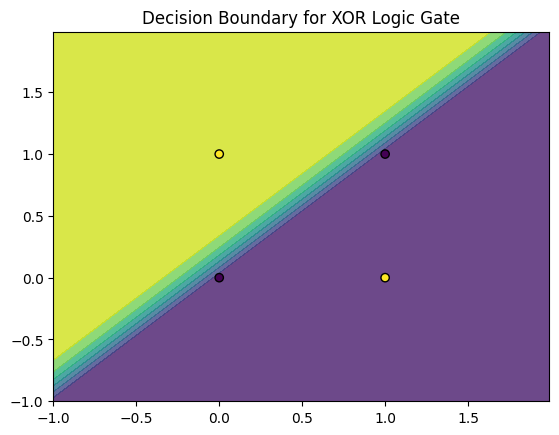

In [4]:
# Visualise the Decision Boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = Z.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Decision Boundary for XOR Logic Gate')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(model, X.numpy(), y.numpy())


In [5]:
# Interactive Interface
def predict_logic_gate(input1, input2):
    inputs = torch.tensor([[input1, input2]], dtype=torch.float32)
    output = model(inputs)
    return output.item()

interface = gr.Interface(fn=predict_logic_gate, inputs=["number", "number"], outputs="number")
interface.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
